In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3><b>Data Acquisition</b></h3>

In [4]:
#Data acquisition
mental_health = pd.read_csv("Mental_Dataset.csv") 

#First five rows of the Dataframe
mental_health.head(5)

C:\Users\alesi\AppData\Local\Temp\ipykernel_22340\1832993841.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health = pd.read_csv("Mental_Dataset.csv")


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [5]:
print('The number of rows is:', mental_health.shape[0])
print('The number of columns is:', mental_health.shape[1])

The number of rows is: 108553
The number of columns is: 11


Before we perform any analysis, we'll first see what our dataset looks like. 

- Entity: - Unique identifier for each country or region included in the data set.
- Code:	- Unique code associated with an Entity/Country or region included in the data set. 
- Year:	- Year that the data about that particular Entity/Country was collected.
- Schizophrenia (%):	- Percentage of people with schizophrenia in that country/region during that year. 
- Bipolar disorder (%):	- Percentage of people with bipolar disorder in that country/region during that year.
- Eating disorders (%):	- Percentage of people with eating disorders in that country/region during that year.
- Anxiety disorders (%):	- Percentage of people with anxiety disorders in that country/region during that year.
- Drug use disorders (%):	- Percentage of people with drug use disorders in that country/region during that year. 
- Depression (%):	- Percentage of people with depression in that country/region during that year.
- Alcohol use disorders (%):	- Percentage of people with alcohol use disorders in that country/region during that year.


As per data scrubbing that I did in excel for the same data set, we have 4 tables described below:

- Table number 1 : First 6,468 rows, it is a table with Mental Health Disorder Shares in %.
- Table number 2 : Rows between 6,469 and 54,276, it is a table with Mental Health Disorder Share per Sex in %.
- Table number 3 : Rows between 54,277 and 102,084, it is a table with Suicide and Depression per 100k inhabitants.
- Table number 4 : Rows after 102,084, it is a table with Prevalence - Depressive disorders per 100k inhabitants.

In [6]:
pd.set_option('display.float_format', '{:.4f}'.format)
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB


As we can see in the line above, before visualizing and analyzing the data, we have to perform some cleaning. There are many null values we need to take care of and numerical data that have been represented as object.

<h3><b>Data Cleaning</b></h3>

In [7]:
#The first thing we have to do is to create a unique table merging the 4 already existing.
#Splitting tables and naming the headers based on columns
table_1 = mental_health.iloc[:6467]

table_2 = mental_health.iloc[6469:54276]
table_2.columns = mental_health.iloc[6468]
table_2 = table_2.iloc[:,:7].drop(columns = 6468)

table_3 = mental_health.iloc[54277:102084]
table_3.columns = mental_health.iloc[54276]
table_3 = table_3.iloc[:,:7].drop(columns = 54276)

table_4 = mental_health.iloc[102085:]
table_4.columns = mental_health.iloc[102084]
table_4 = table_4.iloc[:,:5].drop(columns = 102084)


In [8]:
#Joining tables based on entity, code and year for a deeper analysis

Merge1 = pd.merge(table_1,table_2, how = 'left', on = ['Entity','Code', 'Year'])
Merge2 = pd.merge(Merge1, table_3, how = 'left', on = ['Entity','Code','Year'])
mental_health1 = pd.merge(Merge2, table_4, how = 'left', on =['Entity','Code','Year'])
mental_health1.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population_x,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population_y,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.8288,1.6771,4.0718,0.6724,3.499982,4.647815,12412000.000000,10.318504,4039.755763,12412000.000000,318435.81367
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.8297,1.6847,4.0795,0.6718,3.503947,4.655772,13299000.000000,10.32701,4046.256034,13299000.000000,329044.773956
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.8311,1.6943,4.0884,0.6706,3.508912,4.662066,14486000.000000,10.271411,4053.709902,14486000.000000,382544.572895
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.8309,1.7053,4.0962,0.6697,3.513429,4.669012,15817000.000000,10.376123,4060.203474,15817000.000000,440381.507393
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.8294,1.7161,4.0996,0.6693,3.515578,4.67305,17076000.000000,10.575915,4062.290365,17076000.000000,456916.645489


In [9]:
#Dropping usless columns
mental_health1 = mental_health1.drop(columns=['Population_y', 'Code', 'index']).rename(columns={'Population_x' : 'Population'}).dropna()


In [10]:
mental_health1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 0 to 6466
Data columns (total 15 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Entity                                                                                                     5543 non-null   object 
 1   Year                                                                                                       5543 non-null   object 
 2   Schizophrenia (%)                                                                                          5543 non-null   object 
 3   Bipolar disorder (%)                                                                                       5543 non-null   object 
 4   Eating disorders (%)                                                    

In [11]:
mental_health1.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.8288,1.6771,4.0718,0.6724,3.499982,4.647815,12412000.000000,10.318504,4039.755763,318435.81367
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.8297,1.6847,4.0795,0.6718,3.503947,4.655772,13299000.000000,10.32701,4046.256034,329044.773956
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.8311,1.6943,4.0884,0.6706,3.508912,4.662066,14486000.000000,10.271411,4053.709902,382544.572895
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.8309,1.7053,4.0962,0.6697,3.513429,4.669012,15817000.000000,10.376123,4060.203474,440381.507393
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.8294,1.7161,4.0996,0.6693,3.515578,4.67305,17076000.000000,10.575915,4062.290365,456916.645489


In [12]:
#Check for missing values
mental_health1.isna().sum()

Entity                                                                                                       0
Year                                                                                                         0
Schizophrenia (%)                                                                                            0
Bipolar disorder (%)                                                                                         0
Eating disorders (%)                                                                                         0
Anxiety disorders (%)                                                                                        0
Drug use disorders (%)                                                                                       0
Depression (%)                                                                                               0
Alcohol use disorders (%)                                                                                    0
P

In [13]:
#Changing the type of the object variables that are numerical
mental_health1 = mental_health1.astype({'Year': 'object', 'Schizophrenia (%)': 'float64', 'Bipolar disorder (%)' : 'float64', 'Eating disorders (%)' : 'float64', 'Prevalence in males (%)' : 'float64', 'Prevalence in females (%)' : 'float64', 'Population' : 'float64', 'Suicide rate (deaths per 100,000 individuals)' : 'float', 'Depressive disorder rates (number suffering per 100,000)' : 'float', 'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)' : 'float64' })

In [14]:
mental_health1.describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia (%),5543.0000,0.2089,0.0428,0.1469,0.1800,0.1986,0.2313,0.3751
Bipolar disorder (%),5543.0000,0.7151,0.1648,0.3145,0.6153,0.6933,0.8278,1.2066
Eating disorders (%),5543.0000,0.2348,0.1549,0.0739,0.1215,0.1804,0.2812,0.9440
Anxiety disorders (%),5543.0000,3.9567,1.1459,2.0234,3.1829,3.5154,4.6636,8.9673
Drug use disorders (%),5543.0000,0.8426,0.4607,0.3836,0.5254,0.7116,0.9080,3.4525
Depression (%),5543.0000,3.4791,0.6741,2.1399,2.9586,3.4617,3.8837,6.6028
Alcohol use disorders (%),5543.0000,1.5625,0.8587,0.4469,0.9647,1.4668,1.8602,5.4747
Prevalence in males (%),5543.0000,2.7987,0.5512,1.5941,2.3984,2.7517,3.1183,4.9052
Prevalence in females (%),5543.0000,4.1304,0.8635,2.3481,3.4942,4.1599,4.5958,8.5378
Population,5543.0000,66712536.6552,473578004.4373,45000.0000,1805500.0000,7077000.0000,22643000.0000,7547858944.0000


<h3><b>Data Expolaration</b></h3>

In [15]:
#Grouping the data by year and the average per disorder

Year_grouping = mental_health1.groupby('Year')[['Schizophrenia (%)', 'Bipolar disorder (%)','Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']].mean().reset_index()
Year_grouping.tail(5)

,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
23,2013,0.2110,0.7176,0.2512,3.9688,0.8731,3.4443,1.5820
24,2014,0.2112,0.7179,0.2526,3.9697,0.8759,3.4428,1.5797
25,2015,0.2114,0.7181,0.2541,3.9704,0.8788,3.4420,1.5764
26,2016,0.2116,0.7184,0.2554,3.9710,0.8817,3.4417,1.5723
27,2017,0.2121,0.7193,0.2572,3.9762,0.8850,3.4438,1.5673


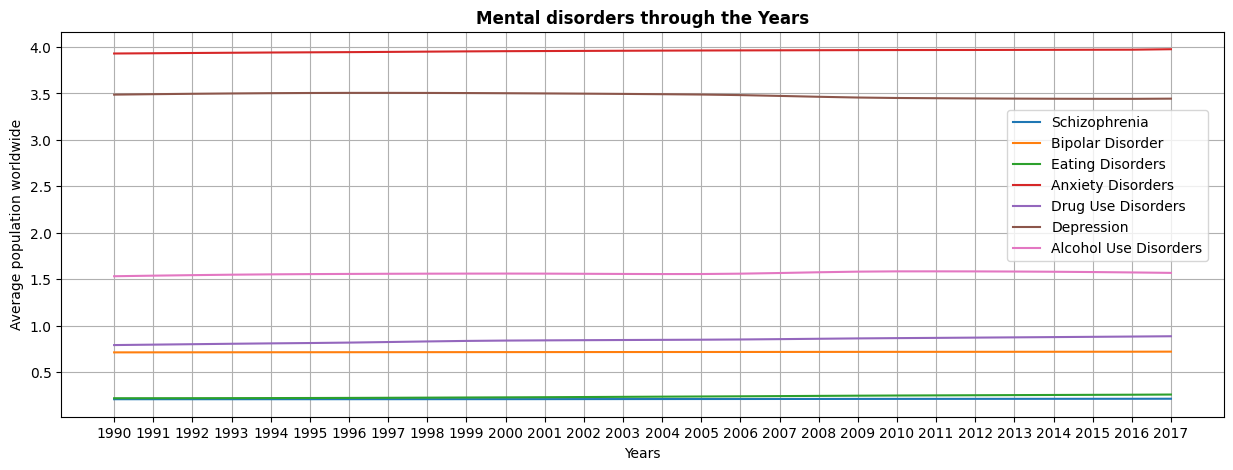

In [16]:
plt.figure(figsize = (15,5))

sns.lineplot(data=Year_grouping, x="Year", y="Schizophrenia (%)", label="Schizophrenia")
sns.lineplot(data=Year_grouping, x="Year", y="Bipolar disorder (%)", label="Bipolar Disorder")
sns.lineplot(data=Year_grouping, x="Year", y="Eating disorders (%)", label="Eating Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Anxiety disorders (%)", label="Anxiety Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Drug use disorders (%)", label="Drug Use Disorders")
sns.lineplot(data=Year_grouping, x="Year", y="Depression (%)", label="Depression")
sns.lineplot(data=Year_grouping, x="Year", y="Alcohol use disorders (%)", label="Alcohol Use Disorders")

plt.title('Mental disorders through the Years',
          fontweight='bold')
plt.ylabel('Average population worldwide')
plt.xlabel('Years')

plt.grid(True)

plt.legend(loc='center', bbox_to_anchor=(0.9, 0.6))

We can observe that the data have not changed too much over the years.

In [17]:
meancountry = mental_health1.groupby('Entity')[['Schizophrenia (%)', 'Bipolar disorder (%)','Eating disorders (%)', 
                                          'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                                          'Alcohol use disorders (%)']].mean().reset_index()

meancountry.head()

,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.1630,0.7024,0.0943,4.8481,2.1208,4.1186,0.6632
1,Albania,0.1965,0.7001,0.1452,3.3689,0.4988,2.1904,1.7468
2,Algeria,0.1950,0.8099,0.1945,5.0114,1.5406,3.6577,0.6537
3,American Samoa,0.2498,0.4671,0.1813,3.2933,0.7594,2.9409,1.1353
4,Andorra,0.2645,0.9643,0.6215,5.2798,0.8850,3.7395,1.2241


In [18]:
Italy= mental_health1[mental_health1['Entity'] == 'Italy']
Italy.set_index('Year')
Italy

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
2828,Italy,1990,0.2349,0.9461,0.5857,5.7277,1.2467,3.7824,0.4584,2.6096,4.8661,57048000.0000,7.1775,3529.1047,2355268.5989
2829,Italy,1991,0.2352,0.9471,0.5892,5.6913,1.2504,3.7150,0.4550,2.5796,4.7653,57088000.0000,7.3509,3462.1018,2319871.5671
2830,Italy,1992,0.2354,0.9480,0.5930,5.6523,1.2562,3.6517,0.4519,2.5538,4.6680,57145000.0000,7.2321,3399.6890,2285844.5592
2831,Italy,1993,0.2356,0.9487,0.5974,5.6121,1.2639,3.5966,0.4494,2.5293,4.5852,57198000.0000,7.0415,3345.5292,2256522.0816
2832,Italy,1994,0.2358,0.9493,0.6008,5.5719,1.2727,3.5557,0.4477,2.5139,4.5213,57214000.0000,7.0271,3305.2598,2235209.2678
2833,Italy,1995,0.2359,0.9496,0.6045,5.5325,1.2815,3.5303,0.4469,2.5066,4.4799,57174000.0000,6.9992,3280.1439,2223043.9745
2834,Italy,1996,0.2360,0.9499,0.6067,5.4832,1.3003,3.5150,0.4471,2.5024,4.4552,57065000.0000,6.8799,3264.6452,2218014.2358
2835,Italy,1997,0.2361,0.9502,0.6109,5.4215,1.3283,3.4990,0.4477,2.4943,4.4324,56904000.0000,6.8413,3248.4949,2214122.8827
2836,Italy,1998,0.2362,0.9505,0.6151,5.3606,1.3613,3.4813,0.4486,2.4840,4.4080,56743000.0000,6.7887,3230.7064,2211074.1857
2837,Italy,1999,0.2363,0.9508,0.6198,5.3136,1.3902,3.4663,0.4494,2.4749,4.3881,56656000.0000,6.4835,3215.5886,2210774.4178


In [21]:
Italy.describe().T

,count,mean,std,min,25%,50%,75%,max
Schizophrenia (%),28.0000,0.2363,0.0006,0.2349,0.2361,0.2364,0.2367,0.2370
Bipolar disorder (%),28.0000,0.9475,0.0020,0.9446,0.9462,0.9466,0.9494,0.9511
Eating disorders (%),28.0000,0.6181,0.0145,0.5857,0.6099,0.6212,0.6269,0.6381
Anxiety disorders (%),28.0000,5.5140,0.1405,5.2939,5.3658,5.5587,5.6319,5.7277
Drug use disorders (%),28.0000,1.3356,0.0924,1.1480,1.2619,1.3317,1.4104,1.4763
Depression (%),28.0000,3.4890,0.0940,3.3924,3.4446,3.4576,3.5030,3.7824
Alcohol use disorders (%),28.0000,0.4561,0.0077,0.4469,0.4498,0.4526,0.4649,0.4672
Prevalence in males (%),28.0000,2.4896,0.0403,2.4330,2.4668,2.4880,2.4963,2.6096
Prevalence in females (%),28.0000,4.4256,0.1388,4.2964,4.3569,4.3756,4.4381,4.8661
Population,28.0000,58263678.5714,1413861.0402,56656000.0000,57082250.0000,57756500.0000,59391000.0000,60674000.0000


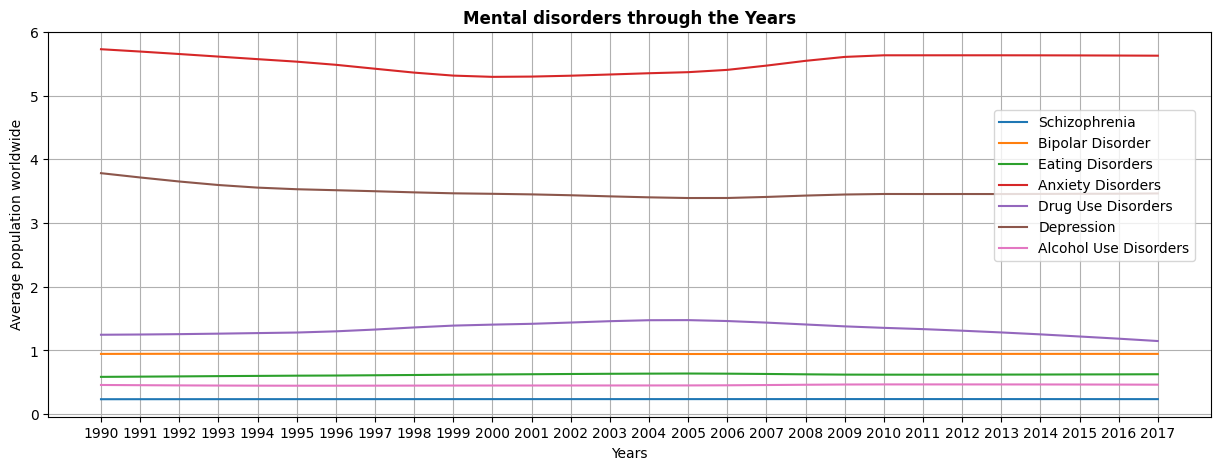

In [22]:
plt.figure(figsize = (15,5))

sns.lineplot(data=Italy, x="Year", y="Schizophrenia (%)", label="Schizophrenia")
sns.lineplot(data=Italy, x="Year", y="Bipolar disorder (%)", label="Bipolar Disorder")
sns.lineplot(data=Italy, x="Year", y="Eating disorders (%)", label="Eating Disorders")
sns.lineplot(data=Italy, x="Year", y="Anxiety disorders (%)", label="Anxiety Disorders")
sns.lineplot(data=Italy, x="Year", y="Drug use disorders (%)", label="Drug Use Disorders")
sns.lineplot(data=Italy, x="Year", y="Depression (%)", label="Depression")
sns.lineplot(data=Italy, x="Year", y="Alcohol use disorders (%)", label="Alcohol Use Disorders")

plt.title('Mental disorders through the Years',
          fontweight='bold')
plt.ylabel('Average population worldwide')
plt.xlabel('Years')

plt.grid(True)

plt.legend(loc='center', bbox_to_anchor=(0.9, 0.6))

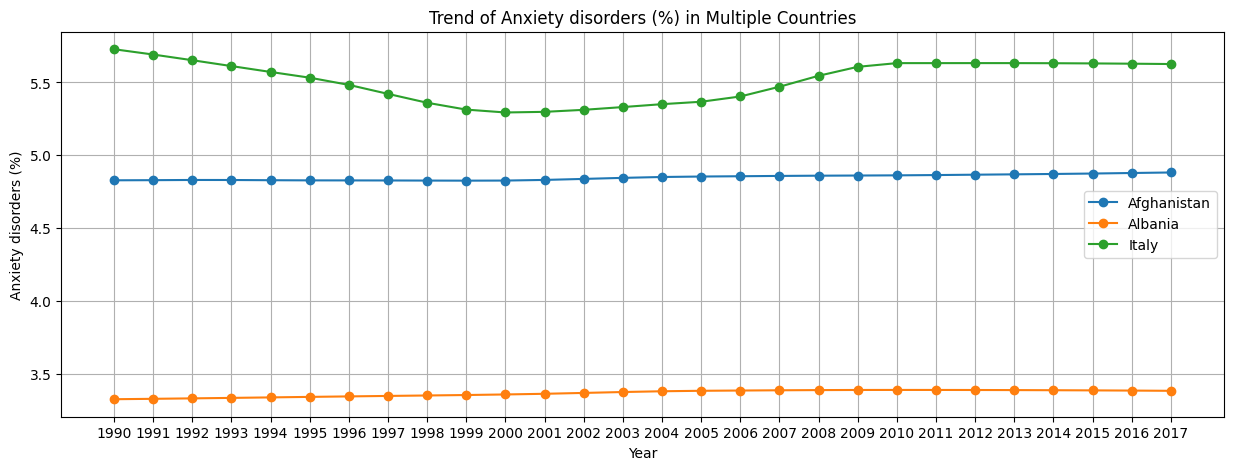

In [ ]:
# Function for visualizing the time line of the diseases in smultiple countries
def plot_trend_multiple_countries(countries, disorder):
    plt.figure(figsize=(15, 5))
    
    for country in countries:
        country_data = mental_health1[mental_health1['Entity'] == country]
        plt.plot(country_data['Year'], country_data[disorder], marker='o', label=country)
    
    plt.title(f'Trend of {disorder} in Multiple Countries')
    plt.xlabel('Year')
    plt.ylabel(disorder)
    plt.legend()
    plt.grid(True)
    plt.show()

# Esempio di visualizzazione per alcuni paesi
countries_to_compare = ['Afghanistan', 'Albania', 'Italy']
plot_trend_multiple_countries(countries_to_compare, 'Anxiety disorders (%)')